In [46]:
import numpy as np
import functions_eq_mag as fc
import functions_fatiando as ft
from timeit import default_timer as time
from matplotlib import pyplot as plt
%matplotlib inline

## Flops count Classical Vs. CGLS Vs. CGLS_BCCB

In [47]:
N = np.arange(10000.,1010000,10000)
it = 50
k = 5

### Classical (Cholesky Factorization)

In [48]:
classical = 5/6 * (N**3) + 6 * (N**2)

In [49]:
#classical = (N + N/3)*N**2

### CGLS

In [50]:
cgls = 2 * (N**2) + it * (4 * N**2 + 12 * N)

### CGLS_BCCB

In [51]:
cgls_bccb = k * 16 * N * np.log2(4*N) + 24 * N + it * (k * 16 * N * np.log2(4*N) + 60 * N)

### Plot Flops Count

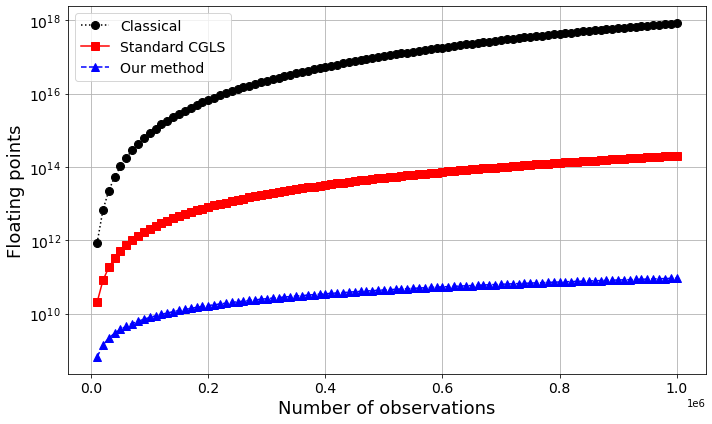

In [54]:
fig = plt.figure(figsize=(10,6))
fig.patch.set_facecolor('xkcd:white')
plt.semilogy(N, classical, 'ko:', alpha=1, markersize=8, label='Classical')
plt.semilogy(N, cgls, 'rs-', alpha=1, markersize=8, label='Standard CGLS')
plt.semilogy(N, cgls_bccb, 'b^--', alpha=1, markersize=8, label='Our method')
#plt.axis('scaled')
#plt.xlim(np.min(N)-1,np.max(N)+1)
#plt.ylim(10**7,10**15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of observations', fontsize=18)
plt.ylabel('Floating points', fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left', fontsize=14);
plt.savefig('figures/flops_mag.png', dpi= 500)